In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA PREPROCESSING**

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


**DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**DATA VISUALIZATION**

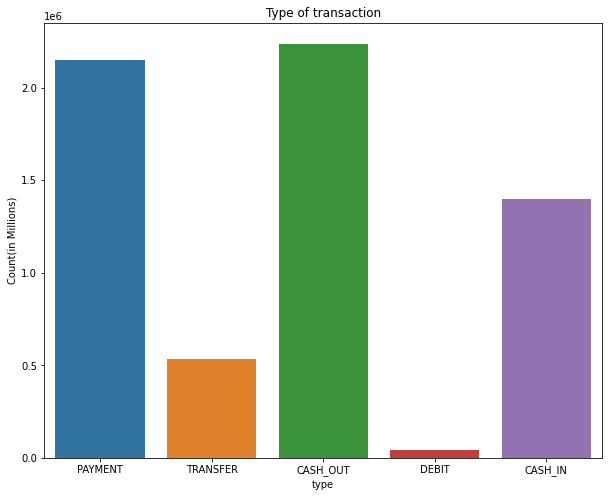

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title("Type of transaction")
sns.countplot(x='type', data=df)
plt.ylabel("Count(in Millions)")
plt.show()

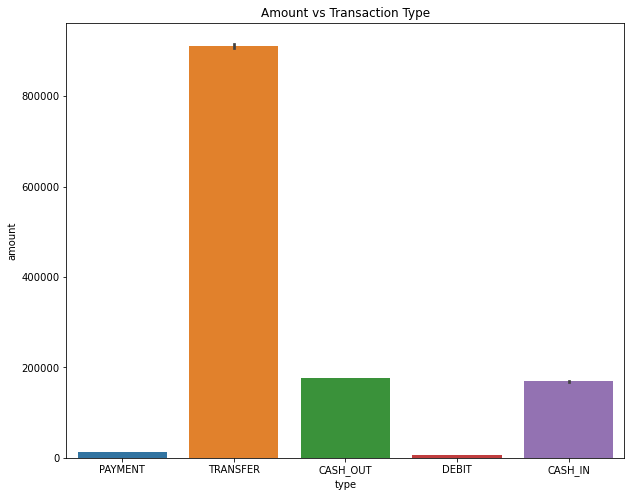

In [8]:
plt.figure(figsize=(10,8))
plt.title("Amount vs Transaction Type")
sns.barplot(x='type', y='amount', data=df)
plt.show()

The total amount of fraudulent transactions:  12056415427.839998
The total number of fraudulent transactions:  8213
The total amount of non-fraudulent transactions:  1132336529331.8708
The total number of fraudulent transactions:  6354407


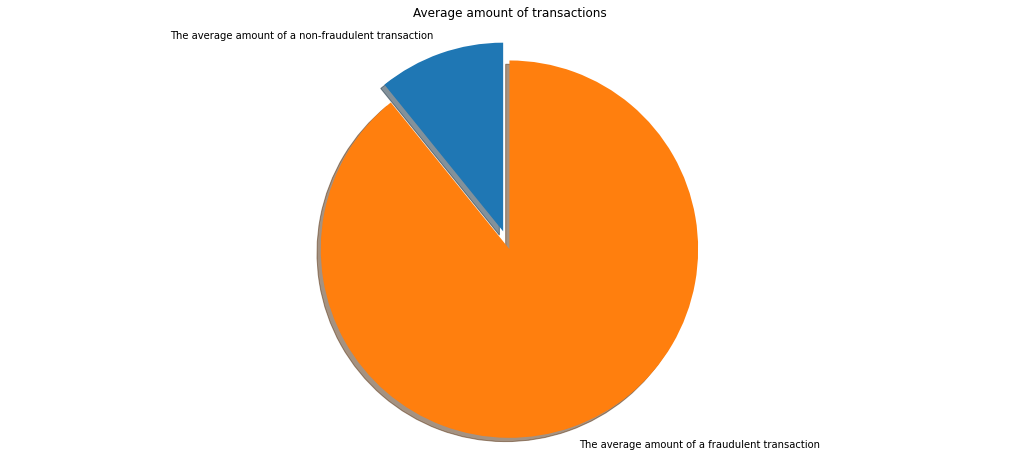

In [9]:
fraudulent_amount = 0
number_of_fraudulent_transactions = 0;
for record in df.itertuples():
    if record.isFraud == True:
        fraudulent_amount += record.amount
        number_of_fraudulent_transactions += 1
print('The total amount of fraudulent transactions: ', fraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_fraudulent_transactions)  
fraudulent_mean = fraudulent_amount / number_of_fraudulent_transactions
        
nonfraudulent_amount = 0
number_of_nonfraudulent_transactions = 0
for record in df.itertuples():
    if record.isFraud == False:
        nonfraudulent_amount += record.amount
        number_of_nonfraudulent_transactions += 1
print('The total amount of non-fraudulent transactions: ', nonfraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_nonfraudulent_transactions)  
nonfraudulent_mean = nonfraudulent_amount / number_of_nonfraudulent_transactions
        
d = {'Class':[0, 1], 'Mean':[nonfraudulent_mean, fraudulent_mean]}

fig, ax = plt.subplots(figsize=(18,8))
plt.title("Average amount of transactions")
ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The average amount of a non-fraudulent transaction', 'The average amount of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

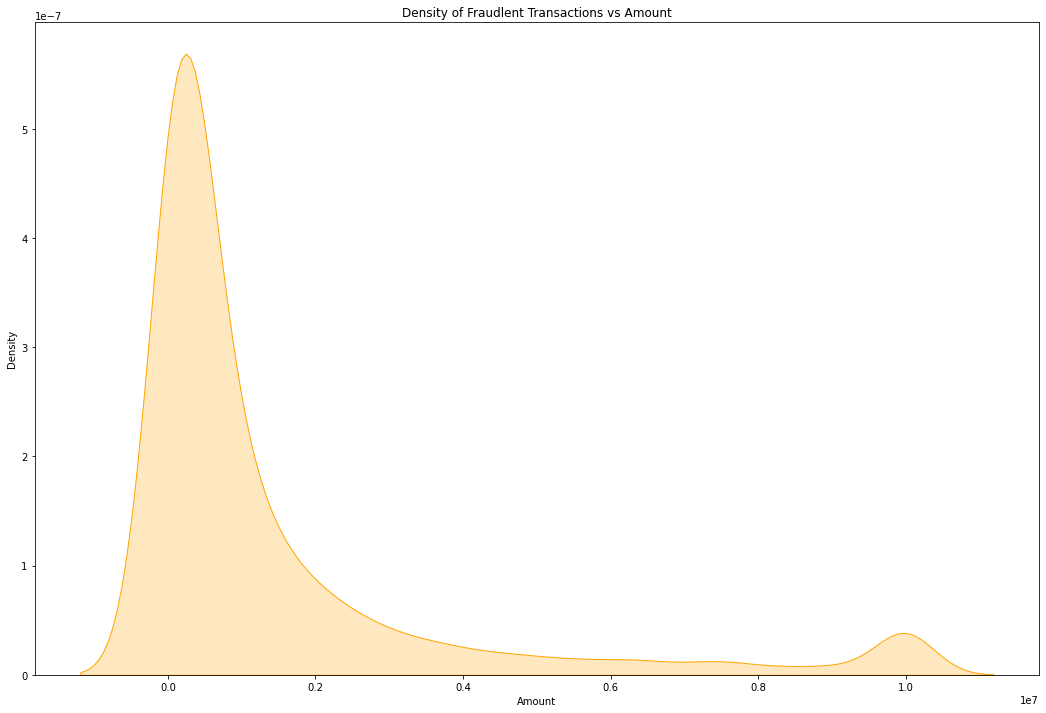

In [10]:
plt.figure(figsize=(18,12))
plt.title("Density of Fraudlent Transactions vs Amount")
fraudulent_transactions = df[df['isFraud'] == 1]
plot = sns.kdeplot(data=fraudulent_transactions["amount"], label="Fraud", shade=True, color='orange')
plot.set(xlabel ='Amount', ylabel ='Density')
plt.show()

*Converting Categorical Values to Numeric*

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['type'])
df.drop("type", axis=1, inplace=True)
df["type"] = label

<AxesSubplot:title={'center':'correlation of each variable'}>

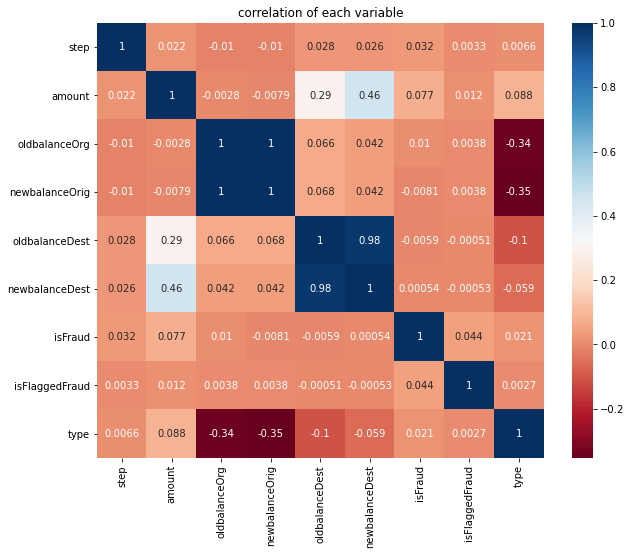

In [12]:
plt.figure(figsize=(10,8))
plt.title("correlation of each variable")
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

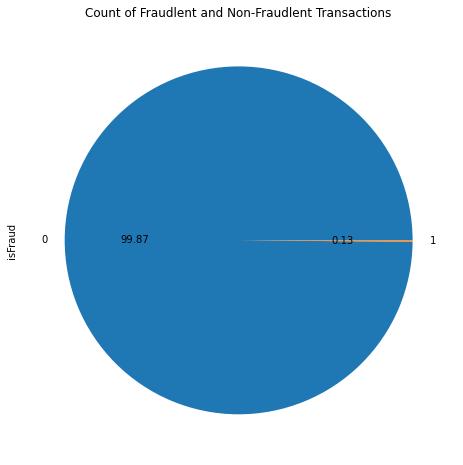

In [13]:
plt.figure(figsize=(10,8))
plt.title("Count of Fraudlent and Non-Fraudlent Transactions")
ax = df['isFraud'].value_counts().plot.pie(autopct='%.2f')

***From the above plot we conclude that we have Unbalanced Dataset***

**Feature Engineering**

In [14]:
X = df.drop(columns = ['nameOrig','nameDest','isFraud'], axis= 1)
y=df['isFraud']

**RANDOM OVERSAMPLING**

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1) 
X, y = ros.fit_resample(X, y)

***NORMALIZATION***

In [16]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

***TRAIN-TEST-SPLIT***

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.3 ,random_state = 42)

***LOGISTIC REGRESSION***

In [18]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
sc = lm.score(X_test, y_test)
print(f"accuracy of model: {sc * 100}")

C:\Users\kulde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy of model: 90.08407549089937


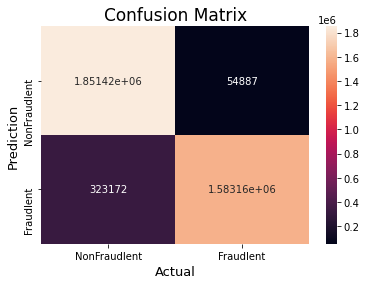

Accuracy   : 0.9008407549089936
Precision : 0.9664924962653788
Recall    : 0.8304747956288923
F1-score  : 0.8933358575121735


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = lm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['NonFraudlent', 'Fraudlent'],
            yticklabels=['NonFraudlent', 'Fraudlent'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

**RANDOM FOREST CLASSIFIER**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_sc = rfc.score(X_test, y_test)
print(f"accuracy of model: {rfc_sc * 100}")

accuracy of model: 99.99735092042401


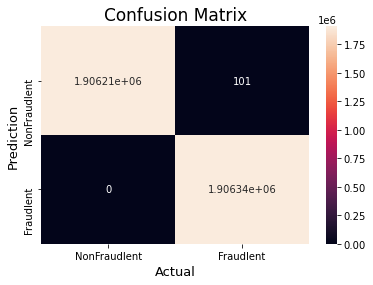

Accuracy   : 0.9999735092042401
Precision : 0.9999470215905377
Recall    : 1.0
F1-score  : 0.9999735100935723


In [22]:
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
 
#Plot the confusion matrix.
sns.heatmap(cm_rfc,
            annot=True,
            fmt='g',
            xticklabels=['NonFraudlent', 'Fraudlent'],
            yticklabels=['NonFraudlent', 'Fraudlent'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print("Accuracy   :", accuracy_score(y_test, y_pred_rfc))
print("Precision :", precision_score(y_test, y_pred_rfc))
print("Recall    :", recall_score(y_test, y_pred_rfc))
print("F1-score  :", f1_score(y_test, y_pred_rfc))

**ADABOOST CLASSIFIER**

In [23]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adc.fit(X_train,y_train)
asc = adc.score(X_test, y_test)
print(f"accuracy of model: {asc * 100}")

accuracy of model: 93.36418680469858


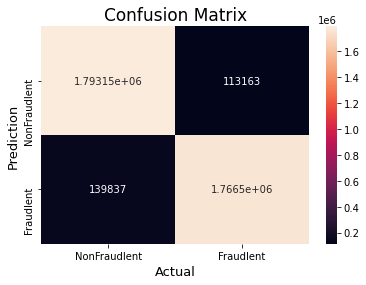

Accuracy   : 0.9336418680469858
Precision : 0.9397960909993393
Recall    : 0.9266461945847951
F1-score  : 0.9331748194267404


In [25]:
y_pred_adc = adc.predict(X_test)
cm_adc = confusion_matrix(y_test,y_pred_adc)
 
#Plot the confusion matrix.
sns.heatmap(cm_adc,
            annot=True,
            fmt='g',
            xticklabels=['NonFraudlent', 'Fraudlent'],
            yticklabels=['NonFraudlent', 'Fraudlent'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print("Accuracy   :", accuracy_score(y_test, y_pred_adc))
print("Precision :", precision_score(y_test, y_pred_adc))
print("Recall    :", recall_score(y_test, y_pred_adc))
print("F1-score  :", f1_score(y_test, y_pred_adc))

***CONCLUSION***\
After testing three models, we have determined that the RandomForestClassifier provides the best fit with an accuracy of 99.9997%.